In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
adultData = pd.read_csv("adult.data",header=None)
Names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
        'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
         'native-country', 'income']
adultData.columns = Names
adultData

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
f=open('adult.test')
df_lst=[]
for l in f.readlines():
    if len(l.strip('.\n').split(', '))==15:
        df_lst.append(list(map(lambda x:x.strip('.\n'),l.split(', '))))

In [4]:
test_data=pd.DataFrame(df_lst)
test_data.columns = Names

In [5]:
adultData=pd.concat([adultData,test_data],axis=0)
adultData

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
adultData[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]=adultData[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']].astype(int)

In [7]:
adultData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [8]:
##Data Preprocessing--The nonnumerical features are processed using One-Hot encoder
adult=adultData.iloc[:,:-1].copy()
object_columns = adult.dtypes=="object"
object_columns = list(object_columns[object_columns].index)
int_columns = adult.dtypes=="int64"
int_columns = list(int_columns[int_columns].index)
for col_name in object_columns:
    values = np.array(adult[col_name])
#     print(values)
    onehot_encoder = OneHotEncoder(sparse=False)
    values = values.reshape(len(values), 1)
    onehot_matrix = onehot_encoder.fit_transform(values)
#     print(onehot_matrix)
    adult.drop([col_name],axis=1,inplace=True)
    for i in range(onehot_matrix.shape[1]):
        adult.insert(0, 'new_'+col_name+"_"+str(i), value=onehot_matrix[:,i])

In [9]:
adult.shape

(48842, 209)

In [10]:
dealData=adult
dealDataY=[0 if i==(' <=50K') or i==('<=50K') else 1 for i in adultData['income']]
# dealDataY

In [11]:
##Data Preprocessing--delete NA data
dealData=dealData.dropna()

In [12]:
##Data Preprocessing
scalerModel=MinMaxScaler()
scalerData=scalerModel.fit_transform(dealData)
dataDf=pd.DataFrame(scalerData,columns=dealData.columns)

In [13]:
##step2---Handle sample imbalance---SMOTETomek Combination of sampling
from imblearn.combine import SMOTETomek
X,y=dataDf,dealDataY
Counter(dealDataY)

Counter({0: 37155, 1: 11687})

In [14]:
##Feature Engineering - Feature Selection
import pandas as pd
import numpy as np
import csv as csv
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

best alpha: 0.0005
Lasso picked 62 variables and eliminated the other 147 variables
0.37635346189840146


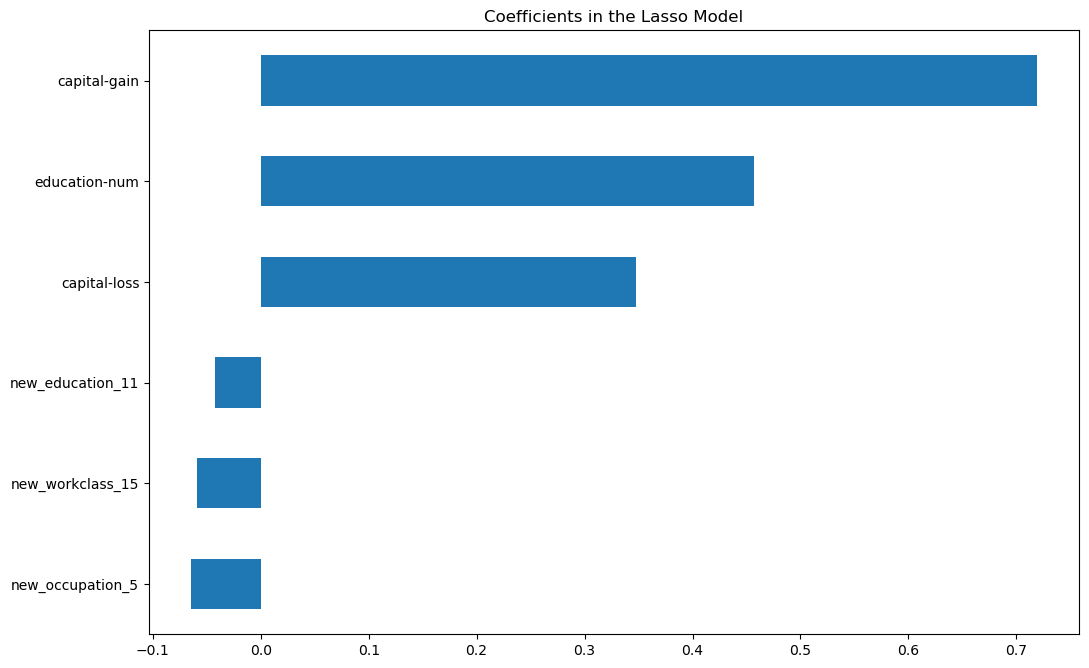

In [15]:
X_train = X
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 3))
    return(rmse)

#Invoke LassoCV function，cross-validation，default cv=3
model_lasso = LassoCV(alphas = [0.1,1,0.001, 0.0005]).fit(X_train, y)

#The optimal regularization parameter selected by the model: alpha
print('best alpha:',model_lasso.alpha_)
#The parameter value of each feature column, or the weight parameter, is 0, indicating that the feature has been removed from the model
#print(model_lasso.coef_)

#The output shows that the model finally selects several feature vectors and removes several feature vectors
coef = pd.Series(model_lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

#Output the average residual value of the selected optimal regularization parameter, since cv is 3, so look at the average value
print(rmse_cv(model_lasso).mean())


#Draw the degree of importance of the feature variable. Here, select the first 3 important and the last 3 unimportant examples
imp_coef = pd.concat([coef.sort_values().head(3),
                     coef.sort_values().tail(3)])
plt.figure(figsize=(12,8),dpi=100)
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [16]:
features=coef[coef!=0]
choose_data=X[list(features.index)]
X_kos=choose_data.copy()

In [17]:
test_length=test_data.shape[0]
test_length

16281

In [18]:
X_train,X_test=X_kos.iloc[:X_kos.shape[0]-test_length,:],X_kos.iloc[X_kos.shape[0]-test_length:,:],
y_train,y_test=y[:X_kos.shape[0]-test_length],y[X_kos.shape[0]-test_length:]

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
tree_model=DecisionTreeClassifier()
knn_model=KNeighborsClassifier()

In [21]:
def model_predict(model,modelname):
    model.fit(X_train,y_train)
    predict=model.predict(X_test)
    acc=accuracy_score(predict,y_test)
    print(modelname,'accuracy:',acc)
    return predict

In [33]:
import time
start=time.perf_counter()
tree_predict=model_predict(tree_model,'DecisionTreeClassifier')
end=time.perf_counter()-start
print("Decision Tree costs:",end,'seconds')

DecisionTreeClassifier accuracy: 0.8091026349732817
Decision Tree costs: 0.300026729999999 seconds


In [34]:
start=time.perf_counter()
knn_predict=model_predict(knn_model,'KNeighborsClassifier')
end=time.perf_counter()-start
print("KNN costs:",end,'seconds')

KNeighborsClassifier accuracy: 0.7637737239727289
KNN costs: 16.266766010999987 seconds


In [24]:
Counter(tree_predict)

Counter({0: 14270, 1: 2011})

In [25]:
Counter(knn_predict)

Counter({0: 16281})

In [26]:
Counter(y_test)

Counter({0: 12435, 1: 3846})

In [27]:
##Optimize decision tree---grid search
from sklearn.model_selection import GridSearchCV
params = {'max_depth':range(1,21),'criterion':np.array(['entropy','gini'])}
clf=DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid=params,scoring='accuracy',cv=5)

# Fit the grid search object to the data to compute the optimal model
grid = grid.fit(X_train, y_train)

In [28]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [29]:
grid.best_score_###The training accuracy is optimized to 85%

0.8563313177085632

In [30]:
##Test accuracy：
model=grid.best_estimator_
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [31]:
predict=model.predict(X_test)
acc=accuracy_score(predict,y_test)
print('optimize DecisionTree accuracy:',acc)

optimize DecisionTree accuracy: 0.8116209078066458
